In [1]:
!pip install torch --upgrade -q

In [2]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 9.8MB/s 
     |████████████████████████████████| 12.8MB 29.8MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
import fastai

In [4]:
from fastai.vision.all import *

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

In [6]:
import torch
#before training
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [7]:
path = Path.cwd()/'waste'/'dataset'/'DATASET'

In [8]:
images = path / 'TRAIN' 

In [9]:
images.ls()

(#2) [Path('/content/waste/dataset/DATASET/TRAIN/R'),Path('/content/waste/dataset/DATASET/TRAIN/O')]

In [10]:
r = images / 'R'
r.ls()

(#9999) [Path('/content/waste/dataset/DATASET/TRAIN/R/R_4669.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_753.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_2814.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_1321.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_1004.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_9931.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_6804.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_266.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_3258.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/R/R_7947.jpg')...]

In [11]:
o = images / 'O'
o.ls()

(#12565) [Path('/content/waste/dataset/DATASET/TRAIN/O/O_11578.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_9229.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_4143.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_10084.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_7843.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_9107.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_7191.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_7865.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_11686.jpg'),Path('/content/waste/dataset/DATASET/TRAIN/O/O_12457.jpg')...]

In [13]:
db = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_items=get_image_files, 
                   get_y=parent_label,
                   item_tfms=Resize(256))

In [14]:
dl = db.dataloaders(images)

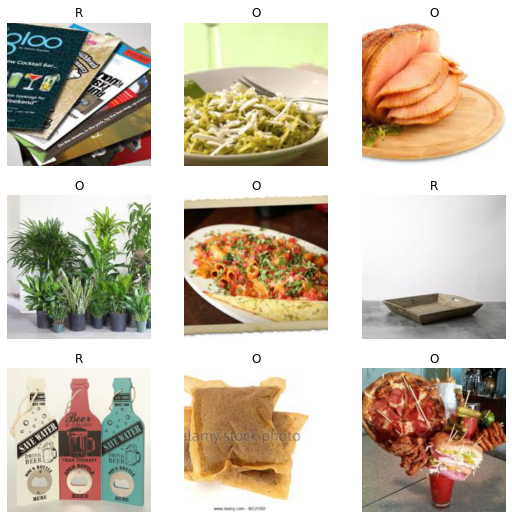

In [15]:
dl.show_batch(nrows=3, ncols=3)

In [25]:
model = cnn_learner(dl, resnet34, metrics=error_rate)
model.fine_tune(1, base_lr=0.1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.581864,5.880316,0.316933,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.263621,0.265564,0.078457,01:21


SuggestedLRs(lr_min=2.290867705596611e-05, lr_steep=1.0964781722577754e-06)

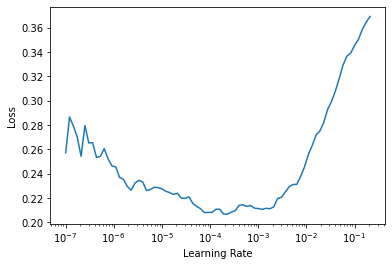

In [27]:
model.lr_find()

In [39]:
model = cnn_learner(dl, resnet34, metrics=error_rate)
model.fine_tune(2, base_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.250192,0.178885,0.059619,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.207374,0.185615,0.066268,01:20
1,0.116103,0.109273,0.039229,01:20


In [16]:
model = cnn_learner(dl, resnet34, metrics=error_rate)
model.fit_one_cycle(1, 1e-2)
model.unfreeze()
model.fit_one_cycle(6, lr_max=slice(1e-6,1e-3))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.198594,0.140922,0.055408,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.139452,0.135194,0.050754,01:20
1,0.127923,0.135302,0.052527,01:20
2,0.077194,0.121218,0.041223,01:20
3,0.053135,0.143641,0.043883,01:19
4,0.024223,0.136855,0.039229,01:20
5,0.017176,0.136377,0.038342,01:20


In [17]:
model.save('resnet34_model')

Path('models/resnet34_model.pth')

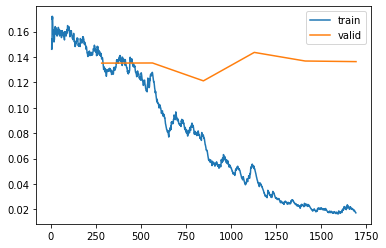

In [18]:
model.recorder.plot_loss()

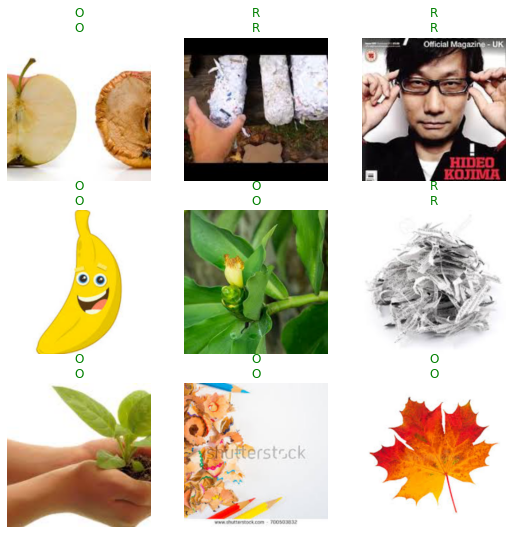

In [19]:
model.show_results()

In [20]:
interp = ClassificationInterpretation.from_learner(model)

In [21]:
interp.print_classification_report()

              precision    recall  f1-score   support

           O       0.97      0.97      0.97      2557
           R       0.95      0.96      0.96      1955

    accuracy                           0.96      4512
   macro avg       0.96      0.96      0.96      4512
weighted avg       0.96      0.96      0.96      4512



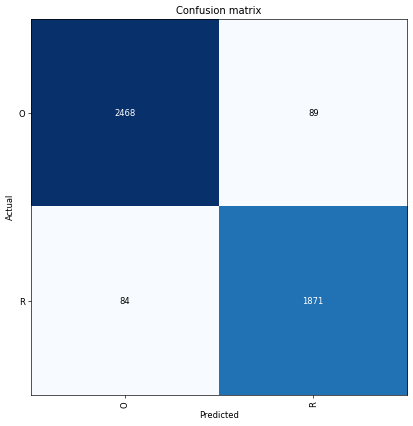

In [22]:
interp.plot_confusion_matrix(figsize=(9,7), dpi=60)

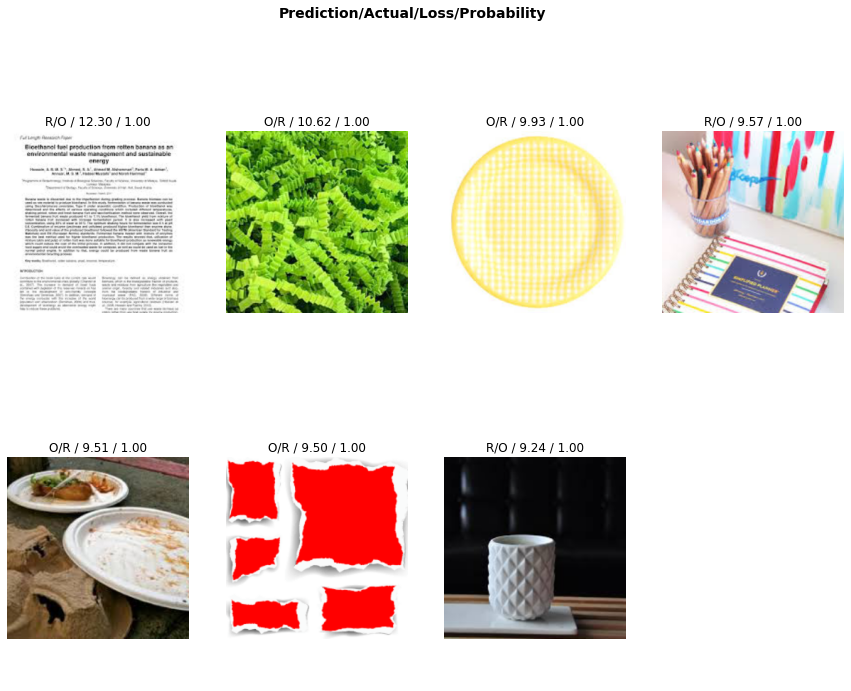

In [23]:
interp.plot_top_losses(7, figsize=(15,11))

TEST

In [24]:
test = path/'TEST'
test.ls()

(#2) [Path('/content/waste/dataset/DATASET/TEST/R'),Path('/content/waste/dataset/DATASET/TEST/O')]

In [25]:
test_images = get_image_files(test)

In [26]:
test_images

(#2513) [Path('/content/waste/dataset/DATASET/TEST/R/R_10522.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10175.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10384.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10903.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10467.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10254.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10151.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10141.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10983.jpg'),Path('/content/waste/dataset/DATASET/TEST/R/R_10322.jpg')...]

In [27]:
test_db = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                  get_y=parent_label,
                   item_tfms=Resize(256))

In [28]:
test_dl = test_db.dataloaders(test)

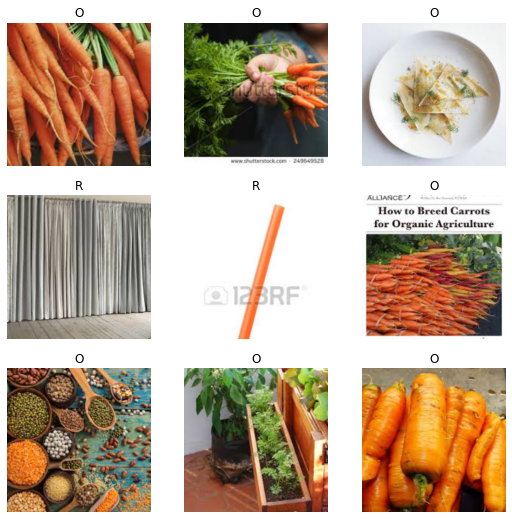

In [29]:
test_dl.show_batch(nrows=3, ncols=3)

In [30]:
tdl = test_dl.test_dl(test_images, with_labels=True)

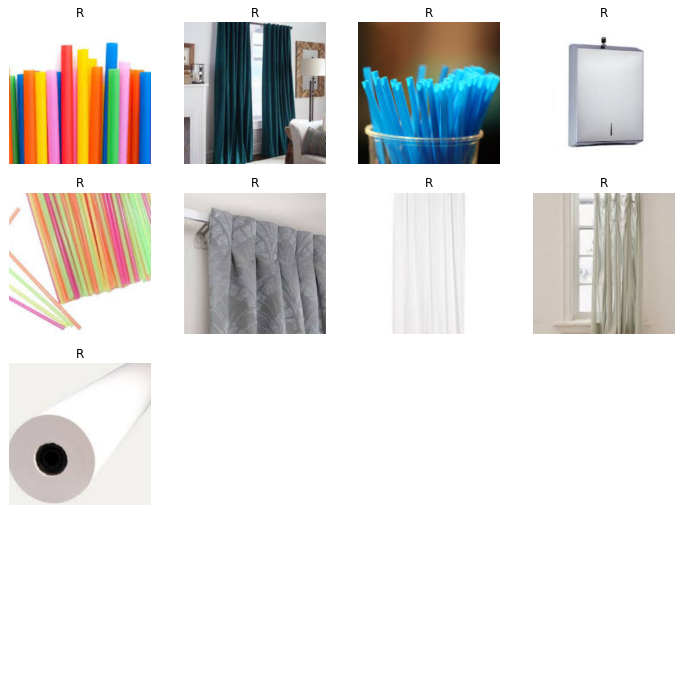

In [31]:
tdl.show_batch(nrows=4, ncols=4)

In [32]:
tdl.vocab

['O', 'R']

In [33]:
preds= model.get_preds(dl=tdl)

In [41]:
pred_df = pd.DataFrame(preds[1], columns = {'Recyclable_predicted'})

In [56]:
pred_df['Recyclable'] = [i.name[0] for i in test_images]

In [58]:
pred_df['Recyclable'] = pred_df['Recyclable'].apply(lambda x: 1 if x == 'R' else 0)

In [61]:
pred_df['Correct_predicted?'] = pred_df.apply(lambda row: True if  row.Recyclable_predicted == row.Recyclable else False, axis=1)

In [63]:
pred_df['Correct_predicted?'].value_counts()

True    2513
Name: Correct_predicted?, dtype: int64

In [78]:
preds= model.get_preds(dl=tdl)
test_result = torch.argmax(preds[0],dim=1)
result = test_result.numpy()

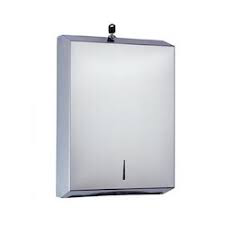

In [66]:
im = PILImage.create(test_images[3])
im.to_thumb(360)